# AS - Campagne expérimentale

2018 - 2019


Binome : Juliette ORTHOLAND, Stieban FERNANDEZ

----

In [1]:
import torch
from test import *

# CUDA pytorch
dtype = torch.cuda.FloatTensor
if torch.cuda.is_available():
    CUDA = True
    dtype = torch.cuda.FloatTensor
    # preciser chaque tensor et activer cuda pour chaque modele
    # A revoir
    
from torch.nn import Linear
from torch.nn import Sequential

from torch.nn import MSELoss
from torch.nn import CrossEntropyLoss

## Jeu de données : MNIST

In [2]:
path = '../data'
batch_size = 6000

train_loader, test_loader = get_dataset(batch_size, path)

In [3]:
for i, (data, target) in enumerate(train_loader):
    print(data.shape, target.shape)
    break

torch.Size([6000, 1, 28, 28]) torch.Size([6000])


In [4]:
dim = 28*28

## Tests préliminaires

### Perceptron

In [5]:
model = Linear( dim, 10 )
loss = CrossEntropyLoss()
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

100%|████████████████████████████████████████| 100/100 [15:17<00:00,  8.75s/it]


TypeError: plot_CS() missing 2 required positional arguments: 'costsV' and 'scoresV'

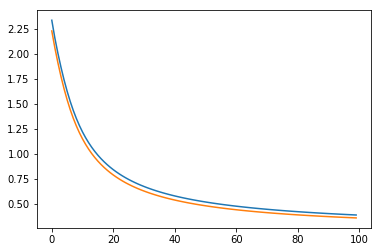

In [7]:
plt.plot(tmp[0])
plt.plot(tmp[1])
plt.show()

### Régression logistique

In [ ]:
model = Sequential(
    Linear( dim, 10 ),
    torch.nn.Sigmoid()
)
loss = CrossEntropyLoss()
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### First NN - Tanh + Sigmoid

In [ ]:
model = Sequential(
    Linear( dim, 15 ),
    torch.nn.Tanh(),
    Linear( 15, 10 ),
    torch.nn.Sigmoid
)
loss = CrossEntropyLoss()
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### NN - 2 hidden layers

In [ ]:
model = Sequential(
    Linear( dim, 15 ),
    torch.nn.Tanh(),
    Linear( 15, 10 ),
    torch.nn.Sigmoid
)
loss = CrossEntropyLoss()
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)

### Highway

In [ ]:
model = Sequential(
    Linear( dim, 10 ),
    HighwayModel(10),
    HighwayModel(10)
)
loss = CrossEntropyLoss()
lr = 1e-4
optim = torch.optim.Adam(model.parameters(), lr)

nn = NeuralNetwork(model, loss, optim)
tmp = nn.fit_eval(train_loader, test_loader, n_epochs=100)
plot_CS(*tmp)